## In this notebook I wll add speakers info to the final dataset for the time being

data_labelled_final.csv

In [16]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from tqdm import tqdm
from ecbdata import ecbdata
from ecbdata import ecbdata

warnings.filterwarnings("ignore")




In [2]:
# Import dataset containing the interveiw data
# df = pd.read_csv('data_labelled_final.csv')
df = pd.read_csv('Final_Working_Data.csv')

# Convert 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df.tail(20)

,Unnamed: 0,Date,Media,Member,Link,Information,Questions,Answers,Metaphors,Metaphors Sentence,...,list_regex_len,list_regex_reduced_len,text_length,pos_metaphors,pos_metaphors_len,YoB_y,Gender_y,Country_y,Period Start,Period End
499,499,2023-03-26,Interview with Business Post,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...",Have you come to expect crisis and are you com...,26 March 2023[end_answer] The situation is qui...,"['optimistic on growth and inflation', 'lower ...",['The projections released last week were more...,...,14,14,11047,"[('low', 'inflation'), ('inflation', 'decline'...",6,1960,M,Spain,2018,TBD
500,500,2023-03-05,Interview with Grupo Vocento,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Christine Lagarde, President of...",Will you raise interest rates by another 50 ba...,5 March 2023[end_answer] It is very likely tha...,NaN,NaN,...,17,17,9046,"[('inflation', 'go'), ('inflation', 'tame'), (...",6,1956,F,France,2019,TBD
501,501,2023-03-01,Interview with IMF Finance and Development mag...,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...","After rising to highs not seen for 40 years, i...",1 March 2023[end_answer] The interview is an u...,NaN,NaN,...,10,9,4740,"[('high', 'inflation'), ('high', 'inflation')]",2,1969,M,Ireland,2019,TBD
502,502,2023-02-28,Interview with Reuters,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...",What is your assessment of economic developmen...,28 February 2023[end_answer] Since the Decembe...,NaN,NaN,...,41,41,20512,"[('low', 'inflation'), ('core', 'inflation'), ...",12,1969,M,Ireland,2019,TBD
503,503,2023-02-27,Interview with The Economic Times (India),Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Christine Lagarde, President of...",A generation of central bankers did not bother...,27 February 2023[end_answer] My predecessors a...,NaN,NaN,...,5,5,10982,"[('deflation', 'fight'), ('inflation', 'fight')]",2,1956,F,France,2019,TBD
504,504,2023-02-25,Interview with Helsingin Sanomat,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Christine Lagarde, President of...","President Christine Lagarde, the European Comm...",25 February 2023[end_answer] The most recent p...,NaN,NaN,...,11,11,6555,"[('high', 'inflation'), ('inflation', 'spread'...",4,1956,F,France,2019,TBD
505,505,2023-02-17,Interview with Bloomberg,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...",How much closer are we to achieving 2% inflati...,17 February 2023[end_answer] We are still far ...,NaN,NaN,...,26,26,13614,"[('inflation', 'core'), ('core', 'inflation'),...",6,1971,F,Germany,2020,TBD
506,506,2023-02-10,Q&A on Twitter,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...",Why ECB is not fighting inflation?[end_questio...,"10 February 2023[end_answer] Hi all, this is@I...",NaN,NaN,...,33,31,14265,"[('high', 'inflation'), ('inflation', 'fight')...",14,1971,F,Germany,2020,TBD
507,507,2023-02-08,Interview with Süddeutsche Zeitung,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","Mr de Guindos, energy prices have fallen recen...","8 February 2023[end_answer] No, weshould still...",NaN,NaN,...,18,18,4812,"[('high', 'inflation'), ('inflation', 'slow'),...",4,1960,M,Spain,2018,TBD
508,508,2023-01-24,Interview with Handelsblatt,Fabio Panetta,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Fabio Panetta, Member of the Ex...",The guidance the ECB gave in December has been...,24 January 2023[end_answer] Our December proje...,NaN,NaN,...,23,23,14272,"[('inflation', 'fight'), ('inflation', 'drop')...",3,1959,M

In [3]:
speakers = df['Member'].unique()
print(speakers)

['Jean-Claude Trichet' 'Otmar Issing' 'Lucas Papademos'
 'Lorenzo Bini Smaghi' 'José Manuel González-Páramo'
 'Tommaso Padoa-Schioppa' 'Mario Draghi' 'Peter Praet' 'Benoît Cœuré'
 'Jörg Asmussen' 'Yves Mersch' 'Vítor Constâncio' 'Sabine Lautenschläger'
 'Christine Lagarde' 'Luis de Guindos' 'Philip R. Lane' 'Isabel Schnabel'
 'Fabio Panetta' 'Frank Elderson']


Board member periods last 8 years and there is no possibility of rejoining.

In [4]:
# Create an empty dataframe
speakers_info = pd.DataFrame(columns=['Member', 'YoB', 'Gender', 'Country', 'Period Start', 'Period End'])

# Set 'Member' column as the index
speakers_info.set_index('Member', inplace=True)

# Add information manually
speakers_info.loc['Jean-Claude Trichet'] = [1942, 'M', 'France', '2003', '2011']
speakers_info.loc['Otmar Issing'] = [1936, 'M', 'Germany', '1998','2006']
speakers_info.loc['Lucas Papademos'] = [1947, 'M', 'Greece', '2002','2010']
speakers_info.loc['Lorenzo Bini Smaghi'] = [1956, 'M', 'Italy', '2005','2011']
speakers_info.loc['José Manuel González-Páramo'] = [1958, 'M', 'Spain', '2004','2012']
speakers_info.loc['Tommaso Padoa-Schioppa'] = [1940, 'M', 'Italy', '1998','2005']
speakers_info.loc['Mario Draghi'] = [1947, 'M', 'Italy', '2011','2019']
speakers_info.loc['Peter Praet'] = [1949, 'M', 'Belgium', '2011','2019']
speakers_info.loc['Benoît Cœuré'] = [1969, 'M', 'France', '2012','2019']
speakers_info.loc['Jörg Asmussen'] = [1966, 'M', 'Germany', '2012','2016']
speakers_info.loc['Yves Mersch'] = [1949, 'M', 'Luxembourg', '2012','2019']
speakers_info.loc['Vítor Constâncio'] = [1943, 'M', 'Portugal', '2010','2018']
speakers_info.loc['Sabine Lautenschläger'] = [1964, 'F', 'Germany', '2014','2019']
speakers_info.loc['Christine Lagarde'] = [1956, 'F', 'France', '2019','TBD']
speakers_info.loc['Luis de Guindos'] = [1960, 'M', 'Spain', '2018','TBD']
speakers_info.loc['Philip R. Lane'] = [1969, 'M', 'Ireland', '2019','TBD']
speakers_info.loc['Fabio Panetta'] = [1959, 'M', 'Italy', '2019','TBD']
speakers_info.loc['Isabel Schnabel'] = [1971, 'F', 'Germany', '2020','TBD']
speakers_info.loc['Frank Elderson'] = [1970, 'M', 'Netherlands', '2020','TBD']

# Add more rows as you get information
print('All info was obtained manually from the ECB website and personal sites or official resumes.')
# Print the dataframe
print(speakers_info)
#https://www.ecb.europa.eu/ecb/decisions/eb/html/ebtimeline.en.html

All info was obtained manually from the ECB website and personal sites or official resumes.
                              YoB Gender      Country Period Start Period End
Member                                                                       
Jean-Claude Trichet          1942      M       France         2003       2011
Otmar Issing                 1936      M      Germany         1998       2006
Lucas Papademos              1947      M       Greece         2002       2010
Lorenzo Bini Smaghi          1956      M        Italy         2005       2011
José Manuel González-Páramo  1958      M        Spain         2004       2012
Tommaso Padoa-Schioppa       1940      M        Italy         1998       2005
Mario Draghi                 1947      M        Italy         2011       2019
Peter Praet                  1949      M      Belgium         2011       2019
Benoît Cœuré                 1969      M       France         2012       2019
Jörg Asmussen                1966      M      Germ

In [5]:
# Merge the original dataframe with the speakers_info dataframe
merged_df = df.merge(speakers_info, left_on='Member', right_index=True, how='left')

# Print the merged dataframe
merged_df.tail(10)

,Unnamed: 0,Date,Media,Member,Link,Information,Questions,Answers,Metaphors,Metaphors Sentence,...,YoB_y,Gender_y,Country_y,Period Start_x,Period End_x,YoB,Gender,Country,Period Start_y,Period End_y
509,509,2023-01-17,Interview with Financial Times,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...","From your perspective, how much do you see the...",17 January 2023[end_answer] The way to think a...,"['inflationary pressure', 'inflationary enviro...",['For me the way to differentiate these narrat...,...,1969,M,Ireland,2019,TBD,1969,M,Ireland,2019,TBD
510,510,2024-04-23,Interview with Le Monde,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","In March, inflation in the euro area was 2.4%,...",23 April 2024[end_answer] The battle isn’t ove...,NaN,NaN,...,1960,M,Spain,2018,TBD,1960,M,Spain,2018,TBD
511,511,2024-03-19,Interview with Naftemporiki,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...",Inflation has been declining and the European ...,19 March 2024[end_answer] Looking at recent in...,NaN,NaN,...,1960,M,Spain,2018,TBD,1960,M,Spain,2018,TBD
512,512,2024-02-07,Interview with Financial Times,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...","Now that inflation is fading, some say it was ...",7 February 2024[end_answer] It's a myth that t...,NaN,NaN,...,1971,F,Germany,2020,TBD,1971,F,Germany,2020,TBD
513,513,2024-02-03,Interview with De Volkskrant,Frank Elderson,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Frank Elderson, Member of the E...",Coming from a supervisor charged with assessin...,3 February 2024[end_answer] In its introductio...,NaN,NaN,...,1970,M,Netherlands,2020,TBD,1970,M,Netherlands,2020,TBD
514,514,2024-01-31,Interview with Die Zeit,Luis de Guindos,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Luis de Guindos, Vice-President...","Mr de Guindos, Germany is in a recession, the ...",31 January 2024[end_answer] There are three re...,NaN,NaN,...,1960,M,Spain,2018,TBD,1960,M,Spain,2018,TBD
515,515,2024-01-22,Thanks to Wolfgang Schäuble,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,"Contribution by Christine Lagarde, President o...",Disclaimer,"Frankfurt am Main, 22 January 2024[end_answer]...",NaN,NaN,...,1956,F,France,2019,TBD,1956,F,France,2019,TBD
516,516,2024-01-13,Interview with Corriere della Sera,Philip R. Lane,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Philip R. Lane, Member of the E...",The rate hike in September was meant to increa...,13 January 2024[end_answer] The first point to...,"['cool down inflation', 'easing of core inflat...",['By underlining that the ECB will maintain a ...,...,1969,M,Ireland,2019,TBD,1969,M,Ireland,2019,TBD
517,517,2024-01-10,Q&A on X,Isabel Schnabel,https://www.ecb.europa.eu/press/inter/date/202...,"Interview with Isabel Schnabel, Member of the ...",Who decided that 2% inflation is good and what...,"10 January 2024[end_answer] Hi all, this is@Is...",NaN,NaN,...,1971,F,Germany,2020,TBD,1971,F,Germany,2020,TBD
518,518,2024-01-03,Tribute article on Wolfgang Schäuble for Die Zeit,Christine Lagarde,https://www.ecb.europa.eu/press/inter/date/202...,Tribute article on Wolfgang Schäuble for Die Z...,NaN,3 January 2024[end_answer] When I think of Wol...,NaN,NaN,...,1956,F,France,2019,TBD,1956,F,France,2019,TBD


### Sources: 
- [Jean-Claude Trichet](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2016/html/biographies/trichet.en.html)
- [Otmar Issing](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2014/html/biographies/issing.en.html)
- [Lucas Papademos](https://elpais.com/internacional/2011/11/07/actualidad/1320692852_268834.html#)
- [Lorenzo Bini Smaghi](https://www.societegenerale.com/sites/default/files/pdf-gouvernance/biography-lorenzo-bini-smaghi.pdf)
- [José Manuel González-Páramo](https://accionistaseinversores.bbva.com/wp-content/uploads/2020/01/7.-ESP-Gonz%C3%A1lez-P%C3%A1ramo-CV.pdf)
- [Tommaso Padoa-Schioppa](https://institutdelors.eu/en/tous-les-contributeurs/padoa-schioppa-tommaso/)
- [Mario Draghi](https://www.britannica.com/biography/Mario-Draghi)
- [Peter Praet](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2017/html/biographies/praet.en.html)
- [Benoît Cœuré](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2016/html/biographies/coeure.en.html)
- [Jörg Asmussen](https://www.consilium.europa.eu/uedocs/cms_data/docs/pressdata/en/ec/125500.pdf)
- [Yves Mersch](https://www.eca.europa.eu/sites/FinancialGovernanceEU/Documents/Yves-Mersch.pdf)
- [Vítor Constâncio](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2017/html/biographies/constancio.en.html)
- [Sabine Lautenschläger](https://www.ecb.europa.eu/press/conferences/ecbforum/previous_fora/2016/html/biographies/lautenschlaeger.en.html)
- [Christine Lagarde](https://www.ecb.europa.eu/ecb/decisions/html/cvlagarde.en.html)
- [Luis de Guindos](https://www.ecb.europa.eu/ecb/decisions/html/cvde_guindos.es.html)
- [Philip R. Lane](https://www.ecb.europa.eu/ecb/decisions/html/cvlane.en.html)
- [Isabel Schnabel](https://www.ecb.europa.eu/ecb/decisions/html/cvschnabel.en.html)
- [Fabio Panetta](https://www.bancaditalia.it/chi-siamo/funzioni-governance/direttorio/fabio-panetta/index.html?com.dotmarketing.htmlpage.language=1)
- [Frank Elderson](https://www.ecb.europa.eu/ecb/decisions/html/cvelderson.en.html)


[Periods](https://www.ecb.europa.eu/ecb/decisions/eb/html/ebtimeline.en.html)

In [6]:
# Export the merged dataframe to a csv file
merged_df.to_csv('Final_Working_Data.csv', index=False)
speakers_info.to_csv('Speakers_Info.csv')

# Poisson regression and analysis

In [7]:
df_in = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', start='2015-01') 
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
df = pd.read_csv("Final_Working_Data.csv")
speaker_info = pd.read_csv("Speakers_Info.csv")

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
data_subset = df[['Date', 'pos_metaphors_len', 'text_length']]

grouped_data = df.groupby('Month').agg(COUNT=('pos_metaphors_len', 'count'), # Number of interviews
                                               SUM=('pos_metaphors_len', 'sum'), # Number of metaphors
                                               AVERAGE_TXT_LENGTH=('text_length', 'mean')) # Average text length

grouped_data = grouped_data[grouped_data.index >= '2015-12-31']

In [9]:
df_in['TIME_PERIOD'] = pd.to_datetime(df_in['TIME_PERIOD']) 
df_in = df_in[['OBS_VALUE', 'TIME_PERIOD']]   
df_in.set_index('TIME_PERIOD', inplace=True)  # Set 'TIME_PERIOD' as the index of df_in

In [10]:
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
df_ir.rename(columns={'Main refinancing operations - fixed rate tenders (fixed rate) (date of changes) - Level (FM.B.U2.EUR.4F.KR.MRR_FR.LEV)': 'INTEREST RATE'}, inplace=True)
df_ir['TIME_PERIOD'] = pd.to_datetime(df_ir['DATE'])
df_ir = df_ir[['INTEREST RATE', 'TIME_PERIOD']]
df_ir_filtered = df_ir[df_ir['TIME_PERIOD'] >= '2015-01-01']
df_ir_filtered.set_index('TIME_PERIOD', inplace=True)
# Resample to monthly frequency and forward fill missing values
df_ir_monthly = df_ir_filtered.resample('M').ffill()

In [11]:
grouped_data.index = grouped_data.index.to_timestamp()
# Standardize the index to the end of the month for all DataFrames
df_ir_monthly.index = df_ir_monthly.index + pd.offsets.MonthEnd(0)
df_in.index = df_in.index + pd.offsets.MonthEnd(0)
grouped_data.index = pd.to_datetime(grouped_data.index, format='%Y-%m') + pd.offsets.MonthEnd(0)

# Convert index to a column for merging
df_ir_monthly['TIME_PERIOD'] = df_ir_monthly.index
df_in['TIME_PERIOD'] = df_in.index
grouped_data['TIME_PERIOD'] = grouped_data.index

# Set the new columns as the index
df_ir_monthly.set_index('TIME_PERIOD', inplace=True)
df_in.set_index('TIME_PERIOD', inplace=True)
grouped_data.set_index('TIME_PERIOD', inplace=True)

# Merge DataFrames on the date index, keeping only rows with data in all three
df_merged = df_ir_monthly.join(df_in, how='inner').join(grouped_data, how='inner')
df_merged['DATE'] = pd.to_datetime(df_merged.index)

# Display the merged DataFrame
print(df_merged.tail())

             INTEREST RATE  OBS_VALUE  COUNT  SUM  AVERAGE_TXT_LENGTH  \
TIME_PERIOD                                                             
2023-12-31             4.5        2.9      3   16         9685.333333   
2024-01-31             4.5        2.8      5   13         7072.400000   
2024-02-29             4.5        2.6      2    8        12607.500000   
2024-03-31             4.5        2.4      1    0         4584.000000   
2024-04-30             4.5        2.4      1    1         5575.000000   

                  DATE  
TIME_PERIOD             
2023-12-31  2023-12-31  
2024-01-31  2024-01-31  
2024-02-29  2024-02-29  
2024-03-31  2024-03-31  
2024-04-30  2024-04-30  


In [12]:
speaker_info.head(25)

,Member,YoB,Gender,Country,Period Start,Period End
0,Jean-Claude Trichet,1942,M,France,2003,2011
1,Otmar Issing,1936,M,Germany,1998,2006
2,Lucas Papademos,1947,M,Greece,2002,2010
3,Lorenzo Bini Smaghi,1956,M,Italy,2005,2011
4,José Manuel González-Páramo,1958,M,Spain,2004,2012
5,Tommaso Padoa-Schioppa,1940,M,Italy,1998,2005
6,Mario Draghi,1947,M,Italy,2011,2019
7,Peter Praet,1949,M,Belgium,2011,2019
8,Benoît Cœuré,1969,M,France,2012,2019
9,Jörg Asmussen,1966,M,Germany,2012,2016


In [13]:
# Convert 'Period Start' to datetime
speaker_info['Period Start'] = pd.to_datetime(speaker_info['Period Start'], format='%Y', errors='coerce')
speaker_info['Period Start'].fillna(pd.Timestamp('now').year, inplace=True)  # Default to current year if invalid

# Replace 'TBD' in 'Period End' with an appropriate end date (e.g., '9999-12-31' for ongoing terms)
speaker_info['Period End'].replace('TBD', pd.Timestamp('2026-12-31'), inplace=True)
speaker_info['Period End'] = pd.to_datetime(speaker_info['Period End'], errors='coerce')

In [14]:
# Create boolean columns for each speaker in df_merged
for speaker in speaker_info['Member']:
    period_start = speaker_info.loc[speaker_info['Member'] == speaker, 'Period Start'].values[0]
    period_end = speaker_info.loc[speaker_info['Member'] == speaker, 'Period End'].values[0]
    df_merged[speaker] = (df_merged.index >= period_start) & (df_merged.index <= period_end)

In [15]:
# List to hold columns with only False observations
columns_with_only_false = []

# Iterate over each column in df_merged
for column in df_merged.columns:
    # Check if all values in the column are False
    if (df_merged[column] == False).all():
        columns_with_only_false.append(column)

# Drop the columns with only False observations from df_merged
df_merged.drop(columns=columns_with_only_false, inplace=True)

# Print the list of dropped columns
print("Dropped columns with only False observations:", columns_with_only_false)
# These columns correspond to speakers who were not present during the selected time period.

Dropped columns with only False observations: ['Jean-Claude Trichet', 'Otmar Issing', 'Lucas Papademos', 'Lorenzo Bini Smaghi', 'José Manuel González-Páramo', 'Tommaso Padoa-Schioppa']


In [17]:
# Convert categorical variables (speaker names) to dummy variables
speaker_dummies = pd.get_dummies(df_merged[['Mario Draghi', 'Peter Praet', 'Benoît Cœuré',
                                            'Jörg Asmussen', 'Yves Mersch', 'Vítor Constâncio',
                                            'Sabine Lautenschläger', 'Christine Lagarde',
                                            'Luis de Guindos', 'Philip R. Lane', 'Fabio Panetta',
                                            'Isabel Schnabel', 'Frank Elderson']])

# Combine dummy variables with numeric variables
X = pd.concat([df_merged[['INTEREST RATE', 'OBS_VALUE', 'COUNT', 'AVERAGE_TXT_LENGTH']], speaker_dummies], axis=1)

# Ensure all columns in X are numeric
X = X.astype(float)  # Convert all columns to float (adjust as needed)

# Target variable
y = df_merged['SUM']

# Add constant to the predictor variables (required for statsmodels)
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    SUM   No. Observations:                   98
Model:                            GLM   Df Residuals:                       89
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -313.96
Date:                Tue, 18 Jun 2024   Deviance:                       371.36
Time:                        15:43:41   Pearson chi2:                     431.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9962
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

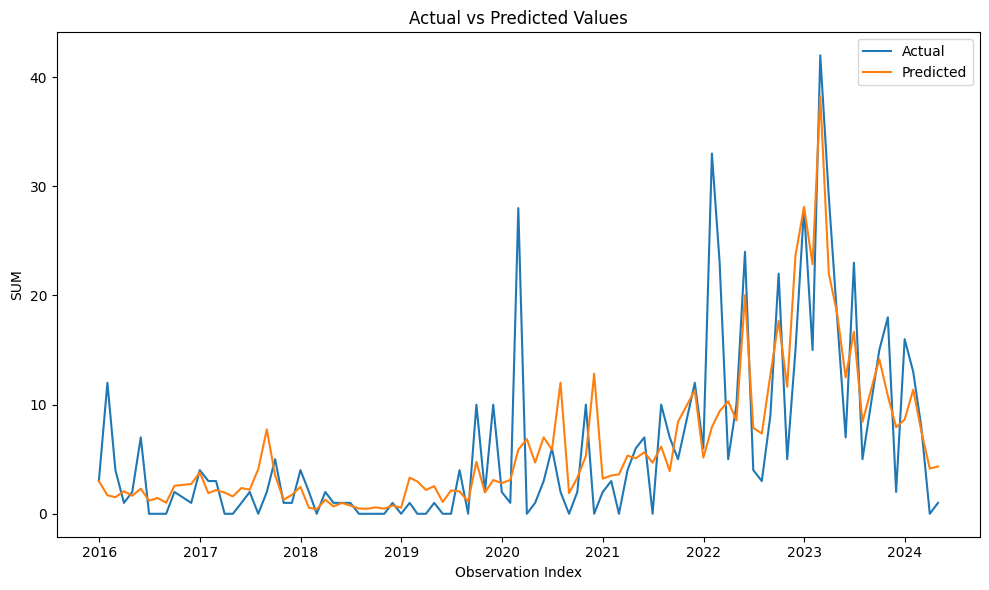

In [18]:
# Now, to make predictions
predictions = poisson_model.predict(X)

# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Sort by the actual values for a meaningful plot
results.sort_values(by='Actual', inplace=True)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.lineplot(data=results.reset_index(), x=results.index, y='Actual', label='Actual')
sns.lineplot(data=results.reset_index(), x=results.index, y='Predicted', label='Predicted')
plt.xlabel('Observation Index')
plt.ylabel('SUM')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

### Now, predict inflation with the number of metaphors and the lagged inflation to check for the significance of the first one.

In [22]:
df_merged

,INTEREST RATE,OBS_VALUE,COUNT,SUM,AVERAGE_TXT_LENGTH,DATE,Mario Draghi,Peter Praet,Benoît Cœuré,Jörg Asmussen,Yves Mersch,Vítor Constâncio,Sabine Lautenschläger,Christine Lagarde,Luis de Guindos,Philip R. Lane,Fabio Panetta,Isabel Schnabel,Frank Elderson
TIME_PERIOD,,,,,,,,,,,,,,,,,,,
2015-12-31,0.05,0.3,4,3,9890.500000,2015-12-31,True,True,True,True,True,True,True,False,False,False,False,False,False
2016-01-31,0.05,0.3,3,12,6491.000000,2016-01-31,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-02-29,0.05,-0.1,3,4,5643.000000,2016-02-29,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-03-31,0.00,0.0,4,1,7632.750000,2016-03-31,True,True,True,False,True,True,True,False,False,False,False,False,False
2016-04-30,0.00,-0.3,3,2,8507.000000,2016-04-30,True,True,True,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,4.50,2.9,3,16,9685.333333,2023-12-31,False,False,False,False,False,False,False,True,True,True,True,True,True
2024-01-31,4.50,2.8,5,13,7072.400000,2024-01-31,False,False,False,False,False,False,False,True,True,True,True,True,True
2024-02-29,4.50,2.6,2,8,12607.500000,2024-02-29,False,False,False,False,False,False,False,True,True,True,True,True,True


In [24]:
import statsmodels.api as sm

# Create a new DataFrame with the variables of interest
data = pd.concat([df_merged['OBS_VALUE'], df_merged['SUM']], axis=1)

# Shift the inflation values by one period to create the lagged variable
data['lagged_inflation'] = data['OBS_VALUE'].shift(1)

# Drop the first row with missing values
data = data.dropna()

# Define the dependent variable (inflation)
y = data['OBS_VALUE']

# Define the independent variables (number of metaphors and lagged inflation)
X = data[['SUM', 'lagged_inflation']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              OBS_VALUE   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1533.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.78e-72
Time:                        15:47:12   Log-Likelihood:                -67.853
No. Observations:                  97   AIC:                             141.7
Df Residuals:                      94   BIC:                             149.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0779      0.069  

### It doesn't explain the inflation (outside of the previous month's inflation)